# 넘파이 활용 기초 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

## 넘파이 활용: 이미지 데이터 처리

사진 파일(png, jpg, pdf 등)을 조작하는 방법을 예제를 이용하여 알아 본다.

먼저 아래 흑백 메뚜기 사진을 확인해보자.

**주의:** 지금부터 `'hamster.png'`라는 이미지 파일이 `'images07'`라는 
디렉토리에 저장되어 있다고 가정한다.

<p>
<table cellspacing="20">
<tr>
<td>
<img src="images07/hamster.png", width=230>
</td>
</tr>
</table>
</p>

**알고 있어야 할 지식**

위 흑백 사진은 브라우저가 사람 눈에 보기 좋게 처리하여  보여주는 것이다. 
하지만 컴퓨터에 그림이 저장될 때는 픽셀(pixel)들의 수치 데이터로 저장된다.
pixel의 어원은 그림을 나타내는 picture의 줄임말 'pix'와 
구성요소를 의미하는 element의 줄임날 'el'을 합쳐서 만들어졌다. 
픽셀을 우리말로 화소(畵素, 그림의 원소)라고 부르는 이유가 이때문이다. 

### 이미지 데이터 확인하기

이제 위 사진의 수치 데이터를 `plt.imread()` 함수를 이용하여 확인해 보자.

In [3]:
img_hamster = plt.imread('images07/hamster.png')
img_hamster

array([[[ 0.02745098,  0.03137255,  0.00784314,  1.        ],
        [ 0.02745098,  0.03137255,  0.00784314,  1.        ],
        [ 0.02745098,  0.03137255,  0.00784314,  1.        ],
        ..., 
        [ 0.03529412,  0.04313726,  0.00392157,  1.        ],
        [ 0.03921569,  0.04705882,  0.00784314,  1.        ],
        [ 0.03921569,  0.04705882,  0.00784314,  1.        ]],

       [[ 0.02745098,  0.03137255,  0.01176471,  1.        ],
        [ 0.02745098,  0.03137255,  0.01176471,  1.        ],
        [ 0.02745098,  0.03137255,  0.01176471,  1.        ],
        ..., 
        [ 0.03529412,  0.04313726,  0.00392157,  1.        ],
        [ 0.03921569,  0.04705882,  0.00784314,  1.        ],
        [ 0.03921569,  0.04705882,  0.00784314,  1.        ]],

       [[ 0.02352941,  0.02745098,  0.00784314,  1.        ],
        [ 0.02352941,  0.02745098,  0.00784314,  1.        ],
        [ 0.02352941,  0.02745098,  0.00784314,  1.        ],
        ..., 
        [ 0.03529412,  0

### 이미지와 3차원 어레이

`img_hopper` 변수에 저장된 어레이의 모양(shape)은 다음과 같다.

In [4]:
img_hamster.shape

(586, 640, 4)

즉, 3차원 어레이이다. 3차원 어레이는 일반적으로 상상하기가 매우 어렵다.
하지만 사진 데이터의 경우에는 다음처럼 이해하면 매우 쉽다.

* 먼저, 해당 사진에 세로(row)를 균등하게 586개로 쪼개고, 가로(column)를 640개로 쪼갠다.
    그러면 `586 x 640` 크기의 격자 모양으로 사진을 쪼개었다고 생각할 수 있다. 
<p>
<table cellspacing="20">
<tr>
<td>
<img src="images07/pixelgrid01.png", width=250>
</td>
</tr>
</table>
</p>
* 이제 각각의 격자 칸에 픽셀 정보가 저장되며, 저장된 정보에 따라 다양한 색들이 보여진다. 
    픽셀 정보는 RGB 정보를 담고 있으며, 
    R은 빨강색(Red), G는 녹색(Green), B는 파랑색(Blue)을 대표한다.
<p>
<table cellspacing="20">
<tr>
<td>
<img src="images07/pixelgrid02.gif", width=180>
</td>
</tr>
</table>
</p>

* 각 칸에 들어 있는 픽셀 정보는 길이가 4인 어레이로 표현되어 있다. 예를 들어, 아래와 같다.
    
        np.array[ 0.40392157,  0.32941177,  0.27058825,  1.0 ]
        
    처음 세 개의 값은 각각 R, G, B에 대한 정보이며, 
    넷 째 항목은 색의 투명도를 나타낸다. 

    **주의:** 경우에 따라 색의 투명도가 생략되어 길이가 3인 어레이로 픽셀 정보가 저장되기도 한다. 

### 수치 데이터에서 사진 재생하기

사진의 수치 데이터를 이용하여 사진을 재생하려면 `plt.imshow()` 함수를 이용하면 된다.

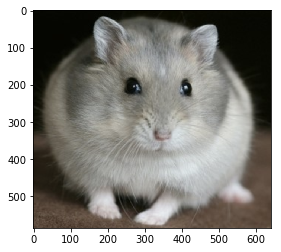

In [5]:
plt.imshow(img_hamster)

**주의:** 위 그림에서 세로가 586개의 칸으로, 가로가 640개의 칸으로 구분되어 있음을 (어느 정도) 눈으로 확인할 수 있다. 

### 썸네일 이미지 만들기

웹에서 작동하는 갤러리 같은 애플리케이션를 사용하다 보면 이미지의 썸네일을 많이 접하게 된다. 
여기서 썸네일을 만들기 위해 이미지를 어떻게 수정하는지 알아본다.

먼저, 어떤 이미지의 썸네일은 기존 이미지의 화소수, 즉 화소의 숫자를 조정해서 만들며,
일반적으로 매우 화소수를 크게 줄인다.
그런데 화소수를 줄이면서 전체 이미지를 유지하기 위해서는 없어진 화소들을 **색 보간법**을 이용하여 픽셀 정보를 보정해야 한다. 

일반적으로 아래 과정을 따른다. 

* 사진 크기 조정: 사진 크기를 조정하기 위해 Pillow 팩키지에 포함된 `Image` 모듈의 `open()` 함수를 이용한다.

* 색 보간법 사용: `plt.imshow()` 함수의 키워드 인자 중에서 `interpolation` 인자를 활용한다.

#### 색 보정 미활용 경우

먼저 색을 보정하지 않을 경우를 살펴본다. 그러면 마치 모자이크처리가 된 것처럼 보일 것이다.

아래 코드에 사용딘 `Image.open()` 함수의 리턴값의 자료형은 이미지를 다루는 클래스이다.
(여기서는 클래스 이름이 중요하지 않다.) 
그리고 해당 클래스의 썸네일(`thumnail`) 메소드를 활용하여 이미지의 화소수를 조정하는 방식을 보여준다.

`thumnail` 메소드에 사용된 두 개의 인자는 다음과 같다.
* 첫째 인자: 화소수 지정 (세로 x 가로)
* 둘째 인자: `Image.ANTIALIAS`는 그림을 처리하는 다양한 방법 중 하나를 나타낸다.
    여기서는 자세히 다루지 않는다.

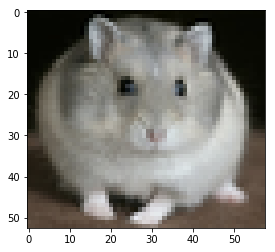

In [6]:
from PIL import Image

img_hamster_small = Image.open('images07/hamster.png')
resized = img_hamster_small.thumbnail((58, 64), Image.ANTIALIAS)
imgplot = plt.imshow(img_hamster_small)

위 그림은 픽셀수를 줄였음에도 불구하고 원본 그림과 동일한 크기로 확대해서 보인 결과물이다.
따라서 모자이크처리를 한 것처럼 흐리게 보인다.
조정된 사진의 실제 크기는 다음과 같다.

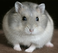

In [7]:
img_hamster_small

#### 색 보정 활용 활용

색을 보정하는 색 보간법을 활용하려면 
`plt.imshow()` 함수의 키워드 인자인 `interpolation` 인자를 활용한다. 
`interpolation` 키워드 인자값으로 `nearest`, `bicubic` 등이 있으며 `bicubic`이 가장 선호되는 옵션이다.

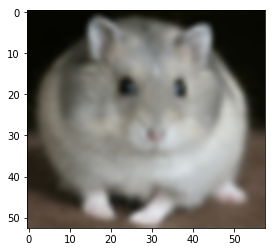

In [8]:
imgplot = plt.imshow(img_hamster_small, interpolation="bicubic")

## 연습문제

### 연습

색 보간법에 사용되는 `interpolation` 키워드의 인자값들 모두 확인해 보아라.